In [202]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [203]:
md = pd.read_csv('clean_metadata.csv')
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entries, 0 to 5367
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5368 non-null   int64  
 1   belongs_to_collection  5368 non-null   int64  
 2   budget                 5368 non-null   float64
 3   genres                 5368 non-null   object 
 4   id                     5368 non-null   int64  
 5   original_language      5368 non-null   object 
 6   overview               5368 non-null   object 
 7   popularity             5368 non-null   float64
 8   production_companies   5368 non-null   object 
 9   production_countries   5368 non-null   object 
 10  release_date           5368 non-null   object 
 11  revenue                5368 non-null   float64
 12  runtime                5368 non-null   float64
 13  spoken_languages       5368 non-null   object 
 14  title                  5368 non-null   object 
 15  vote

In [204]:
md['return'] = md['revenue'] / md['budget']
md['is_flop'] = md['return'].apply(lambda x: 1 if x < 1 else 0)
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entries, 0 to 5367
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5368 non-null   int64  
 1   belongs_to_collection  5368 non-null   int64  
 2   budget                 5368 non-null   float64
 3   genres                 5368 non-null   object 
 4   id                     5368 non-null   int64  
 5   original_language      5368 non-null   object 
 6   overview               5368 non-null   object 
 7   popularity             5368 non-null   float64
 8   production_companies   5368 non-null   object 
 9   production_countries   5368 non-null   object 
 10  release_date           5368 non-null   object 
 11  revenue                5368 non-null   float64
 12  runtime                5368 non-null   float64
 13  spoken_languages       5368 non-null   object 
 14  title                  5368 non-null   object 
 15  vote

In [205]:
column_list = [0, 7, 15, 16]
md = md.drop(columns=md.columns[column_list])
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entries, 0 to 5367
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  5368 non-null   int64  
 1   budget                 5368 non-null   float64
 2   genres                 5368 non-null   object 
 3   id                     5368 non-null   int64  
 4   original_language      5368 non-null   object 
 5   overview               5368 non-null   object 
 6   production_companies   5368 non-null   object 
 7   production_countries   5368 non-null   object 
 8   release_date           5368 non-null   object 
 9   revenue                5368 non-null   float64
 10  runtime                5368 non-null   float64
 11  spoken_languages       5368 non-null   object 
 12  title                  5368 non-null   object 
 13  return                 5368 non-null   float64
 14  is_flop                5368 non-null   int64  
dtypes: f

In [206]:
data = md.to_numpy()

Graph budget vs. is_flop.

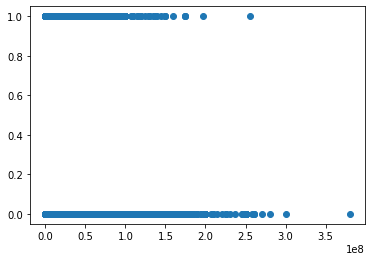

In [207]:
plt.scatter(data[:,1], data[:,14])
plt.show()

Find flop rate for movies in a collection vs movies not in a collection.

In [208]:
sum_in = 0
num_in = 0
sum_not_in = 0
num_not_in = 0


for i in range(data.shape[0]):
    if (data[i,0]==1):
        sum_in += data[i,14]
        num_in += 1
    else:
        sum_not_in += data[i,14]
        num_not_in += 1

prob1 = float(sum_in) / num_in
prob2 = float(sum_not_in) / num_not_in
print("prob of flop if in collection: %0.5f" % prob1)
print("prob of flop if not in collection: %0.5f" % prob2)

prob of flop if in collection: 0.09730
prob of flop if not in collection: 0.35682


Graph runtime vs. is_flop.

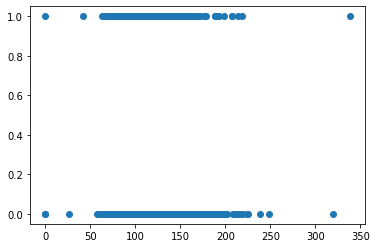

In [209]:
plt.scatter(data[:,10], data[:,14])
plt.show()

Graph genre vs. flop rate. 

In [210]:
genres = data[:,2]
genre_list = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
              'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
              'History', 'Horror', 'Music', 'Mystery', 'Romance',
              'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
n = len(genre_list)
sum_flop = [0]*n
num_flop = [0]*n
for i in range(genres.size):
    for j in range(n):
        if genre_list[j] in genres[i]:
            sum_flop[j] += data[i,14]
            num_flop[j] += 1
            
flop_rate = [x/y for x,y in zip(sum_flop, num_flop)]
print(flop_rate)

[0.2781316348195329, 0.24112734864300625, 0.2226027397260274, 0.2833152762730228, 0.29651162790697677, 0.3559322033898305, 0.34972889233152593, 0.21092278719397364, 0.24853228962818003, 0.40625, 0.3446808510638298, 0.26791808873720135, 0.3177083333333333, 0.34085778781038373, 0.29289940828402367, 0.277602523659306, 0.0, 0.31491344873502, 0.28921568627450983, 0.2808988764044944]


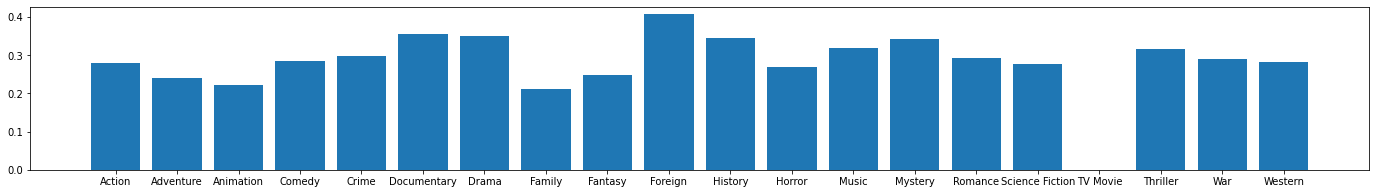

In [218]:
plt.figure(figsize=(24,3))
plt.bar(genre_list, flop_rate)
plt.show()